In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "whitegrid")

# **Data Preparing**

In [ ]:
df19 = pd.read_csv("/content/sample_data/Divvy_Trips_2019_Q1.csv")
df20 = pd.read_csv("/content/sample_data/Divvy_Trips_2020_Q1.csv")



In [ ]:
df19.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [ ]:
df20.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239.0,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234.0,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296.0,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51.0,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66.0,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


In [ ]:
df19.info()
df20.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83250 entries, 0 to 83249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_id            83250 non-null  int64  
 1   start_time         83250 non-null  object 
 2   end_time           83250 non-null  object 
 3   bikeid             83250 non-null  int64  
 4   tripduration       83250 non-null  object 
 5   from_station_id    83250 non-null  int64  
 6   from_station_name  83250 non-null  object 
 7   to_station_id      83250 non-null  int64  
 8   to_station_name    83250 non-null  object 
 9   usertype           83249 non-null  object 
 10  gender             79503 non-null  object 
 11  birthyear          79865 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62711 entries, 0 to 62710
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  

# **Data Processing & Cleaning**

In [ ]:
# Droping unwanted column from 2019 dataset
df19.drop(["bikeid","gender","birthyear"],axis=1,inplace=True)

In [ ]:
# Renaming columns in 2019
df19.rename(columns= {
    "trip_id": "ride_id",
    "start_time": "started_at",
    "end_time": "ended_at",
    "from_station_name": "start_station_name",
    "from_station_id": "start_station_id",
    "to_station_name": "end_station_name",
    "to_station_id": "end_station_id",
    "tripduration": "ride_length",
    "usertype": "member_casual"
    },inplace =True)

In [ ]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83250 entries, 0 to 83249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ride_id             83250 non-null  int64 
 1   started_at          83250 non-null  object
 2   ended_at            83250 non-null  object
 3   ride_length         83250 non-null  object
 4   start_station_id    83250 non-null  int64 
 5   start_station_name  83250 non-null  object
 6   end_station_id      83250 non-null  int64 
 7   end_station_name    83250 non-null  object
 8   member_casual       83249 non-null  object
dtypes: int64(3), object(6)
memory usage: 5.7+ MB


In [ ]:
df19["member_casual"] = df19["member_casual"].replace({"Subscriber": "member",
    "Customer": "casual"})


In [ ]:
# Changing datatype
df19["started_at"] = pd.to_datetime(df19["started_at"])
df19["ended_at"] = pd.to_datetime(df19["ended_at"])
df20["started_at"]  = pd.to_datetime(df20["started_at"])
df20["ended_at"] = pd.to_datetime(df20["ended_at"])

In [ ]:
# Droping unwanted column from 2020 dataset
df20.drop(["rideable_type","start_lat","start_lng","end_lat","end_lng"], axis=1, inplace=True)

In [ ]:
df20.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62711 entries, 0 to 62710
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             62711 non-null  object        
 1   started_at          62711 non-null  datetime64[ns]
 2   ended_at            62711 non-null  datetime64[ns]
 3   start_station_name  62711 non-null  object        
 4   start_station_id    62710 non-null  float64       
 5   end_station_name    62710 non-null  object        
 6   end_station_id      62710 non-null  float64       
 7   member_casual       62710 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 3.8+ MB


In [ ]:
# Calculating ride_length for 2020
df20["ride_length"] = (df20["ended_at"] - df20["started_at"]).dt.total_seconds()

In [ ]:
# Converting 2019 ride_length datatype
df19["ride_length"] = pd.to_numeric(df19["ride_length"],errors = "coerce")

In [ ]:
# Adding day of week
df19["day_of_week"] = df19["started_at"].dt.day_name()
df20["day_of_week"] = df20["started_at"].dt.day_name()


In [ ]:
# Combining both 2019 and 2020 dataset

df = pd.concat([df19,df20],ignore_index= True)

In [ ]:
# Removing - or 0 ride duration
df = df[df["ride_length"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130475 entries, 0 to 145960
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             130475 non-null  object        
 1   started_at          130475 non-null  datetime64[ns]
 2   ended_at            130475 non-null  datetime64[ns]
 3   ride_length         130475 non-null  float64       
 4   start_station_id    130474 non-null  float64       
 5   start_station_name  130475 non-null  object        
 6   end_station_id      130474 non-null  float64       
 7   end_station_name    130474 non-null  object        
 8   member_casual       130473 non-null  object        
 9   day_of_week         130475 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 10.9+ MB


In [23]:
df.rename(columns= { "member_casual": "user_type"},inplace =True)

In [ ]:
df = pd.read_csv("/content/sample_data/cleaned_cyclistics_trip_data_2019_2020.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130475 entries, 0 to 130474
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             130475 non-null  object 
 1   started_at          130475 non-null  object 
 2   ended_at            130475 non-null  object 
 3   ride_length         130475 non-null  float64
 4   start_station_id    130474 non-null  float64
 5   start_station_name  130475 non-null  object 
 6   end_station_id      130474 non-null  float64
 7   end_station_name    130474 non-null  object 
 8   user_type           130473 non-null  object 
 9   day_of_week         130475 non-null  object 
dtypes: float64(3), object(7)
memory usage: 10.0+ MB


In [25]:
# checking for null value
df.isnull().sum()

,0
ride_id,0
started_at,0
ended_at,0
ride_length,0
start_station_id,1
start_station_name,0
end_station_id,1
end_station_name,1
user_type,2
day_of_week,0


In [28]:
# droping row with null value
df.dropna(inplace=True)
df.isnull().sum()

,0
ride_id,0
started_at,0
ended_at,0
ride_length,0
start_station_id,0
start_station_name,0
end_station_id,0
end_station_name,0
user_type,0
day_of_week,0


# **Data Analyze**

In [33]:
df["user_type"].value_counts()


,count
user_type,
member,125421
casual,5052


In [35]:
df['day_of_week'].value_counts()


,count
day_of_week,
Thursday,26737
Wednesday,24371
Friday,23131
Tuesday,22696
Monday,17939
Saturday,7872
Sunday,7727


In [36]:
df['ride_length'].describe()

,ride_length
count,1.304730e+05
mean,8.233289e+02
std,3.106385e+04
min,2.000000e+00
25%,3.050000e+02
50%,4.670000e+02
75%,7.010000e+02
max,9.387024e+06


In [97]:
df.to_csv("cleaned_cyclistics_trip_data_2019_2020.csv", index = False)

In [98]:
from google.colab import files
files.download("cleaned_cyclistics_trip_data_2019_2020.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130473 entries, 0 to 130473
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             130473 non-null  object        
 1   started_at          130473 non-null  datetime64[ns]
 2   ended_at            130473 non-null  datetime64[ns]
 3   ride_length         130473 non-null  float64       
 4   start_station_id    130473 non-null  float64       
 5   start_station_name  130473 non-null  object        
 6   end_station_id      130473 non-null  float64       
 7   end_station_name    130473 non-null  object        
 8   user_type           130473 non-null  object        
 9   day_of_week         130473 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 10.9+ MB


In [38]:
# Average ride length by user type
df.groupby("user_type")["ride_length"].mean()

,ride_length
user_type,
casual,7375.587886
member,559.401735


In [39]:
# Trip by day Vs user type
df.groupby(["day_of_week","user_type"])["ride_id"].count()

day_of_week  user_type
Friday       casual         920
             member       22211
Monday       casual         480
             member       17459
Saturday     casual         663
             member        7209
Sunday       casual         628
             member        7099
Thursday     casual         918
             member       25819
Tuesday      casual         671
             member       22025
Wednesday    casual         772
             member       23599
Name: ride_id, dtype: int64

In [40]:
# Peak hours
df.groupby(df["started_at"].dt.hour)["ride_id"].count()


,ride_id
started_at,
0,582
1,380
2,269
3,172
4,393
5,1804
6,5752
7,11656
8,15059


# **Data Visualization**

In [41]:
weakday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories = weakday_order, ordered = True)

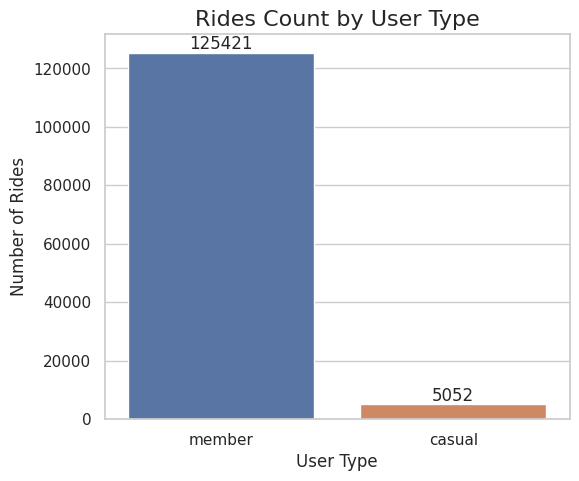

In [81]:
# Ride Count by User Type
plt.figure(figsize =(6,5))
ax = sns.countplot(data = df, x = "user_type",hue = "user_type")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Rides Count by User Type", fontsize = 16)
plt.xlabel("User Type",fontsize =12)
plt.ylabel("Number of Rides", fontsize = 12)
plt.show()

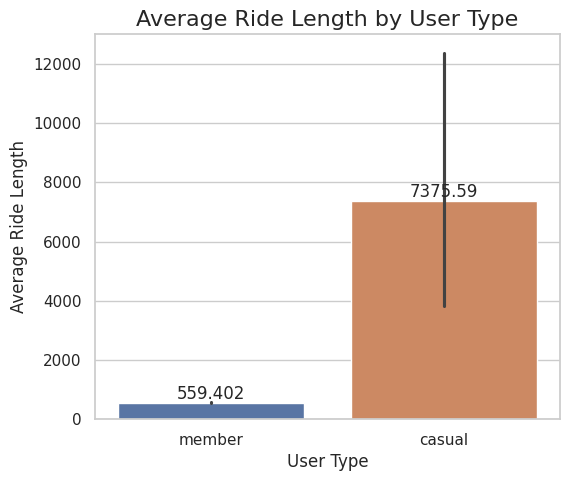

In [80]:
# Average Ride length by User Type
plt.figure(figsize =(6,5))
ax = sns.barplot(data = df, x = "user_type", y = "ride_length", hue = "user_type", estimator="mean")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Average Ride Length by User Type", fontsize = 16)
plt.xlabel("User Type",fontsize =12)
plt.ylabel("Average Ride Length", fontsize = 12)
plt.show()

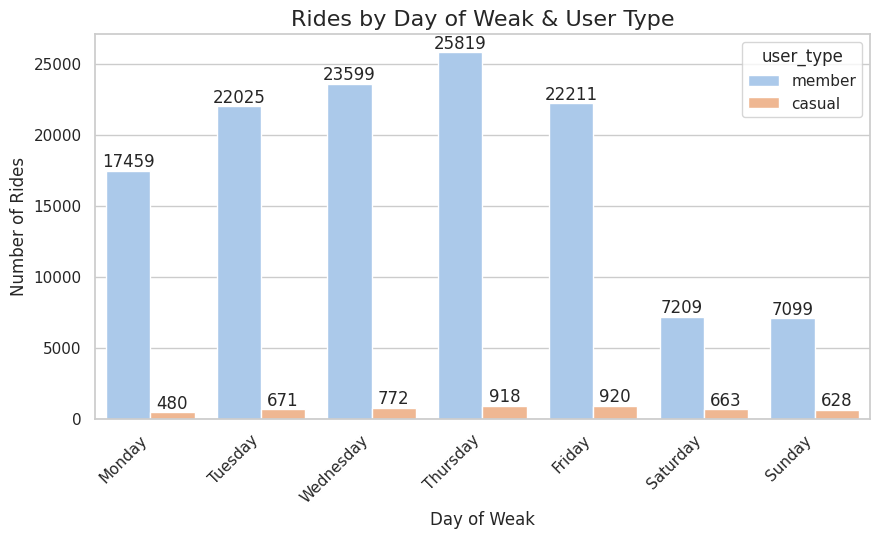

In [86]:
# Rides Count by Day of Week & User Type
plt.figure(figsize=(10,5))
ax =sns.countplot(data=df,x ="day_of_week", hue ="user_type", palette="pastel")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Rides by Day of Week & User Type", fontsize = 16)
plt.xlabel("Day of Week",fontsize =12)
plt.ylabel("Number of Rides", fontsize = 12)
plt.xticks(rotation=45,ha='right')
plt.show()

In [87]:
#Adding Hour column
df["hour"] = df["started_at"].dt.hour

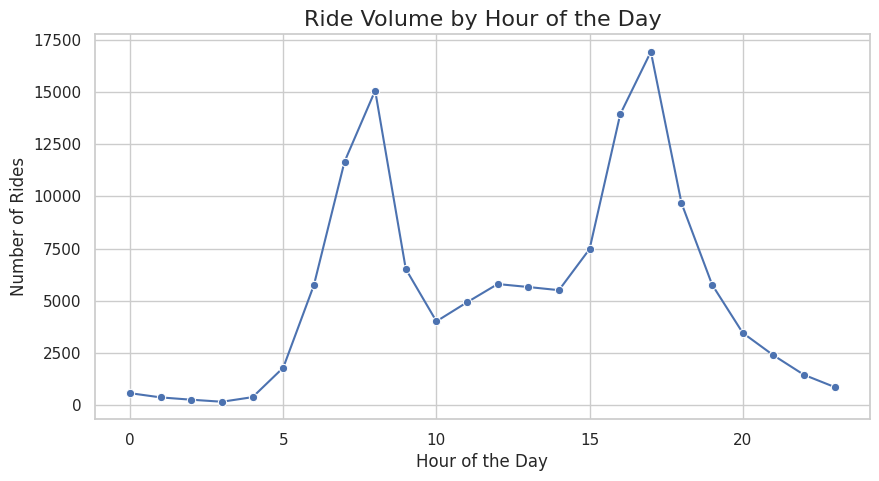

In [94]:
# Ride Volume by Hour
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('hour')['ride_id'].count(), marker="o")
plt.title("Ride Volume by Hour of the Day", fontsize = 16)
plt.xlabel("Hour of the Day",fontsize =12)
plt.ylabel("Number of Rides", fontsize = 12)
plt.show()